<a href="https://colab.research.google.com/github/jimpo96/Audio-Noise-Reduction/blob/main/wave_file_noise_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download & Import Python Packages (in Google Colab)

> Import the sys module, which provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter



In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


> Install necessary development packages for Python and PortAudio using the apt-get package manager

> Install the PyAudio library using the pip package manager







In [ ]:
!apt-get install -y python3-dev portaudio19-dev
!pip install pyaudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 0s (558 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ...

> Install the noisereduce library using the pip package manager



In [ ]:
!pip install noisereduce

> Import all the libraries that will be used in this Python programming project



In [ ]:
import pyaudio
import struct
import wave
from matplotlib import pyplot as plt
from matplotlib import animation
import random
import IPython
from scipy.io import wavfile
import soundfile as sf
import numpy as np
import io
import noisereduce as nr
from noisereduce.generate_noise import band_limited_noise
from google.colab import files
import statistics
import math

#Functions

> Function to generate band-limited noise



In [ ]:
def noisy_audio_clip(min_freq, max_freq, samples, samplerate):
    noise = np.random.randn(samples)
    noise_fft = np.fft.fft(noise)
    f = np.fft.fftfreq(len(noise), 1/samplerate)
    noise_fft[(f < min_freq) | (f > max_freq)] = 0
    return np.fft.ifft(noise_fft).real

# Load Data

 > Upload the audio file from local storage



In [ ]:
uploaded = files.upload()

Saving author.wav to author (1).wav


> Get the audio file from uploaded folder



In [ ]:
file_path = list(uploaded.keys())[0]
data, rate = sf.read(io.BytesIO(uploaded[file_path]))

> To listen the imported audio file



In [ ]:
IPython.display.Audio(data=data, rate=rate)


> Plot the wave graph of the audio signal

> Plot the spectrum of the audio signal







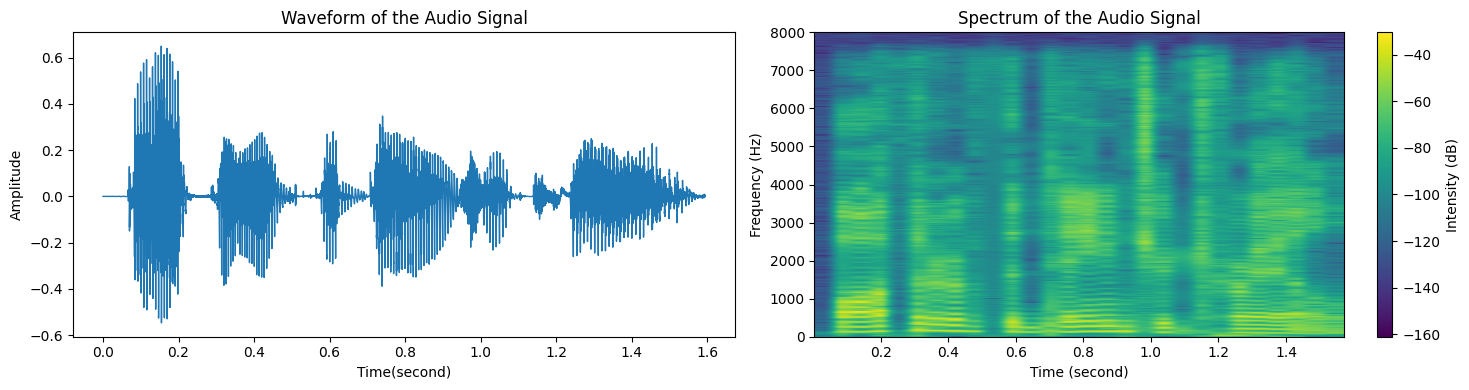

In [ ]:
plt.figure(figsize=(15, 4))
time = np.arange(0, len(data)) / rate
plt.subplot(1, 2, 1)
plt.plot(time, data, lw=1)
plt.title('Waveform of the Audio Signal')
plt.xlabel('Time(second)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
specgram = plt.specgram(data, Fs=rate, cmap='viridis', NFFT=1024)
plt.title('Spectrum of the Audio Signal')
plt.xlabel('Time (second)')
plt.ylabel('Frequency (Hz)')

cbar = plt.colorbar(specgram[3], ax=plt.gca())
cbar.set_label('Intensity (dB)')

plt.tight_layout()
plt.show()

# Add Noise

> Parameters for noise addition

> Generate band-limited noise







In [ ]:
noise_len = 2  # seconds
noise_factor = 0.2105
min_freq = 2000
max_freq = 12000

noise = noisy_audio_clip(min_freq=min_freq, max_freq=max_freq, samples=len(data), samplerate=rate) * noise_factor
noise_clip = noise[:rate * noise_len]
noisy_audio_clip = data + noise


> Plot the wave graph of the audio with added band-limited noise

> Plot the spectrum of the audio with added band-limited noise







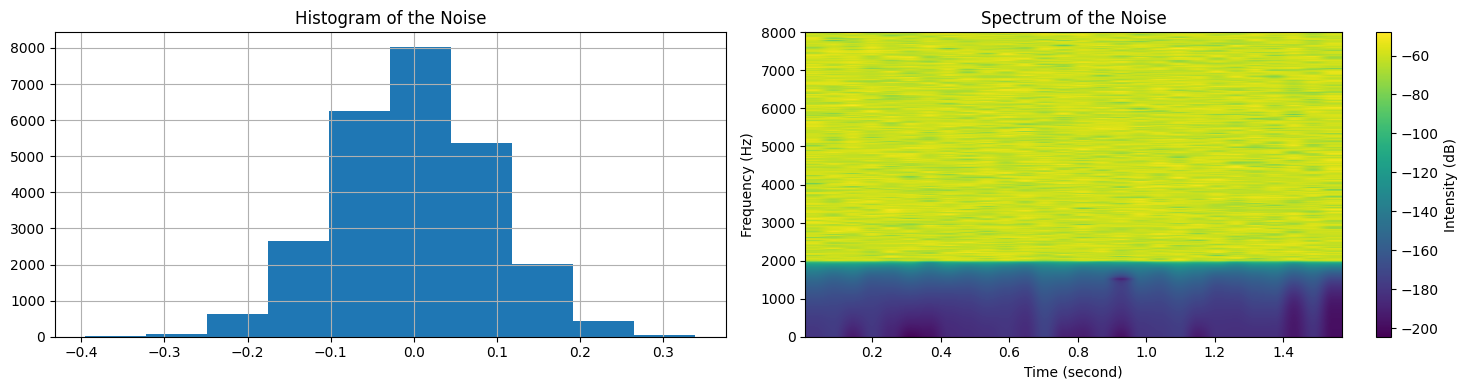

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
noise_hist = [noise]
plt.hist(noise_hist)
plt.title("Histogram of the Noise")
plt.grid()

plt.subplot(1, 2, 2)
specgram = plt.specgram(noise, Fs=rate, cmap='viridis', NFFT=1024)
plt.title('Spectrum of the Noise')
plt.xlabel('Time (second)')
plt.ylabel('Frequency (Hz)')

cbar = plt.colorbar(specgram[3], ax=plt.gca())
cbar.set_label('Intensity (dB)')

plt.tight_layout()
plt.show()
plt.clf()

> Print statistical measures of the noise data



In [ ]:
print("The mean of the noise is % s."%(statistics.mean(noise)))

print("The variance of noise is % s."%(statistics.variance(noise)))

std = math.sqrt(statistics.variance(noise))
print("The standard deviation of noise  is %s."%std)

The mean of the noise is 6.271722590031172e-20.
The variance of noise is 0.008312457105488972.
The standard deviation of noise  is 0.0911726774066056.


Brownian Motion (Wiener Process):

Definition: Brownian motion is a continuous-time stochastic process where the increments are normally distributed with mean zero and variance proportional to the time increment.

Characteristics: Brownian motion is used to model continuous random motion and is a fundamental process in stochastic calculus. It is often used in finance and physics.

> Noisy histogram to show how the statical value is varying




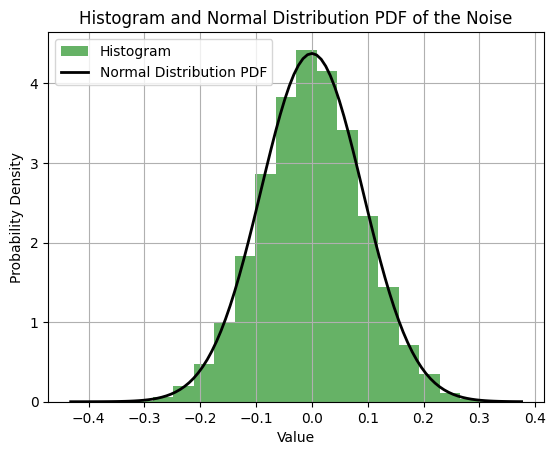

In [ ]:
mean_noise = np.mean(noise)
std_dev_noise = np.std(noise)


plt.hist(noise, bins=20, density=True, alpha=0.6, color='g', label='Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1/(std_dev_noise * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_noise)**2 / (2 * std_dev_noise**2))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution PDF')

plt.title('Histogram and Normal Distribution PDF of the Noise')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.grid()
plt.show()

> Calculate the Energy of the Noise




In [ ]:
sum_noise = 0
noises = np.array(noise)

for noise_value in noises:
  sum_noise += (noise_value**2)

print("The energy of the noise is %s." % sum_noise)

The energy of the noise is 211.95934373286275.


> Calculate the Energy of the Data(Original Wave File Voice)



In [ ]:
sum_data = 0
datas = np.array(data)

for data_value in datas:
    sum_data += (data_value **2)
print("The energy of the data is %s." % sum_data)

The energy of the data is 212.8913103369996.


> Calculate the Energy of the Audio Clip Band Limited



In [ ]:
sum_noisy_audio_clip = 0
noisy_audio_clips = np.array(noisy_audio_clip)

for noisy_audio_clip_value in noisy_audio_clips:
    sum_noisy_audio_clip += (noisy_audio_clip_value ** 2)
print("The energy of the noisy_audio_clip is %s" % sum_noisy_audio_clip)

The energy of the noisy_audio_clip is 424.423546338016


> Plotting the graph and spectrum with added band limited noise



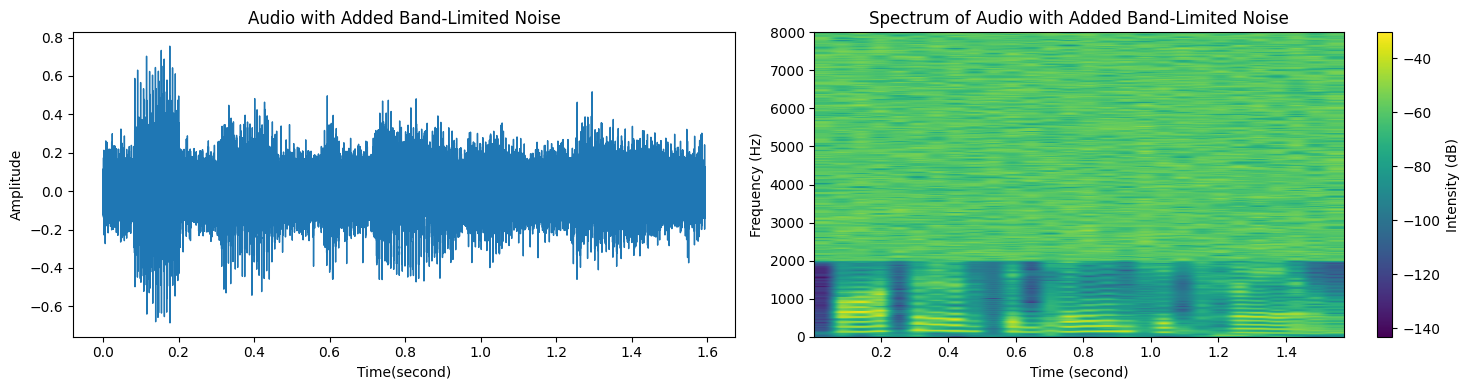

In [ ]:
plt.figure(figsize=(15, 4))
time = np.arange(0, len(noisy_audio_clip)) / rate
plt.subplot(1, 2, 1)
plt.plot(time, noisy_audio_clip, lw=1)
plt.title('Audio with Added Band-Limited Noise')
plt.xlabel('Time(second)')
plt.ylabel('Amplitude')


plt.subplot(1, 2, 2)
specgram = plt.specgram(noisy_audio_clip, Fs=rate, cmap='viridis', NFFT=1024)
cbar = plt.colorbar(specgram[3])
plt.title('Spectrum of Audio with Added Band-Limited Noise')
plt.xlabel('Time (second)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity (dB)')

plt.tight_layout()
plt.show()

In [ ]:
IPython.display.Audio(data=noisy_audio_clip, rate=rate)

#Stationary Noise Reduction

> Apply noise reduction to the noisy_audio_clip using the reduce_noise function from the noisereduce library

> The stationary parameter is set to True, indicating a stationary noise reduction





In [ ]:
reduced_noise_stationary = nr.reduce_noise(y = noisy_audio_clip, sr=rate, n_std_thresh_stationary=1.638,stationary=True)

In [ ]:
IPython.display.Audio(data=reduced_noise_stationary, rate=rate)

> Calculate the Energy of the Reduced Noise Stationary



In [ ]:
sum_reduced_noise_stationary = 0
reduced_noises_stationary = np.array(reduced_noise_stationary)

for reduced_noise_stationary_value in reduced_noise_stationary:
    sum_reduced_noise_stationary += (reduced_noise_stationary_value **2)
print("The energy of the reduced_noise is %s." % sum_reduced_noise_stationary)

The energy of the reduced_noise is 13.816871948967982.


> Calculate the Energy of the Noise (Reduced Noise Stationary)



In [ ]:
energy_noise_stationary = (sum_reduced_noise_stationary - sum_data)
print("The energy of noise is %s."%abs(energy_noise_stationary)) # Giving negative value so I using the abs() function

The energy of noise is 199.0744383880316.


> Plot the wave graph of the stationary remove noise specific therhold

> Plot the spectrum of the stationary remove noise specific therhold







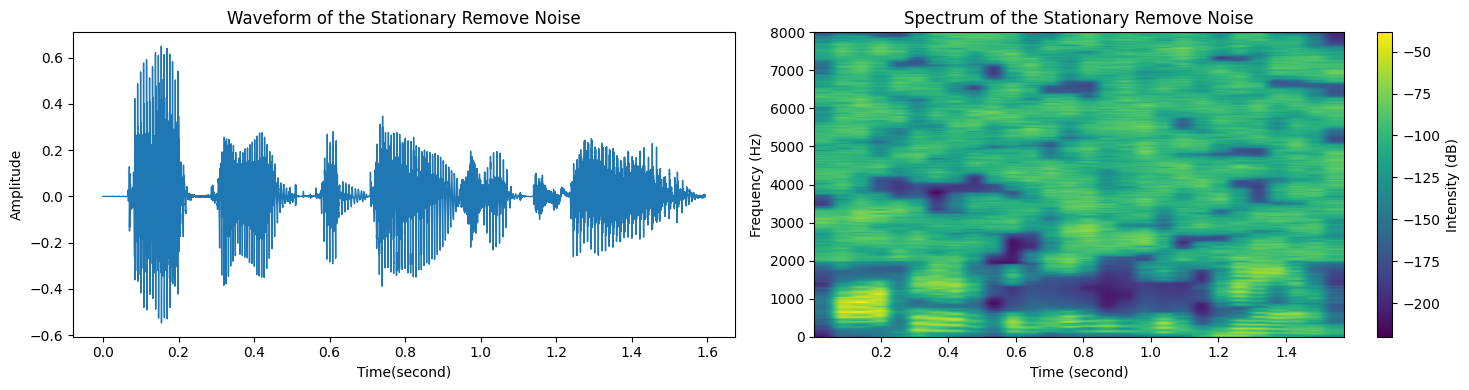

In [ ]:
plt.figure(figsize=(15, 4))
time = np.arange(0, len(reduced_noise_stationary)) / rate
plt.subplot(1, 2, 1)
plt.plot(time, data, lw=1)
plt.title('Waveform of the Stationary Remove Noise')
plt.xlabel('Time(second)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
specgram = plt.specgram(reduced_noise_stationary, Fs=rate, cmap='viridis', NFFT=1024)
cbar = plt.colorbar(specgram[3])
plt.title('Spectrum of the Stationary Remove Noise')
plt.xlabel('Time (second)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity (dB)')

plt.tight_layout()
plt.show()

# Non-Stationary Noise Reduction

> Apply noise reduction to the noisy_audio_clip using the reduce_noise function from the noisereduce library

> The stationary parameter is set to True, indicating a non-stationary noise reduction








In [ ]:
reduced_noise_nonstationary = nr.reduce_noise(y = noisy_audio_clip, sr=rate, n_std_thresh_stationary=1.638,stationary=False)

> Calculate the Energy of the Reduced Noise NonStationary



In [ ]:
sum_reduced_noise_nonstationary = 0
reduced_noises_nonstationary = np.array(reduced_noise_nonstationary)

for reduced_noise_nonstationary_value in reduced_noise_nonstationary:
    sum_reduced_noise_nonstationary += (reduced_noise_nonstationary_value**2)
print("The energy of the reduced_noise_nonstationary  is %s." % sum_reduced_noise_nonstationary)

The energy of the reduced_noise_nonstationary  is 114.67921776202701.


> Calculate the Energy of the Noise (Reduced Noise NonStationary)



In [ ]:
energy_noise_nonstationary = sum_reduced_noise_nonstationary - sum_data
print("The energy of noise is %s."%abs(energy_noise_nonstationary))

The energy of noise is 98.21209257497259.


> Plot the wave graph of the non-stationary remove noise specific therhold

> Plot the spectrum of the non-stationary remove noise specific therhold




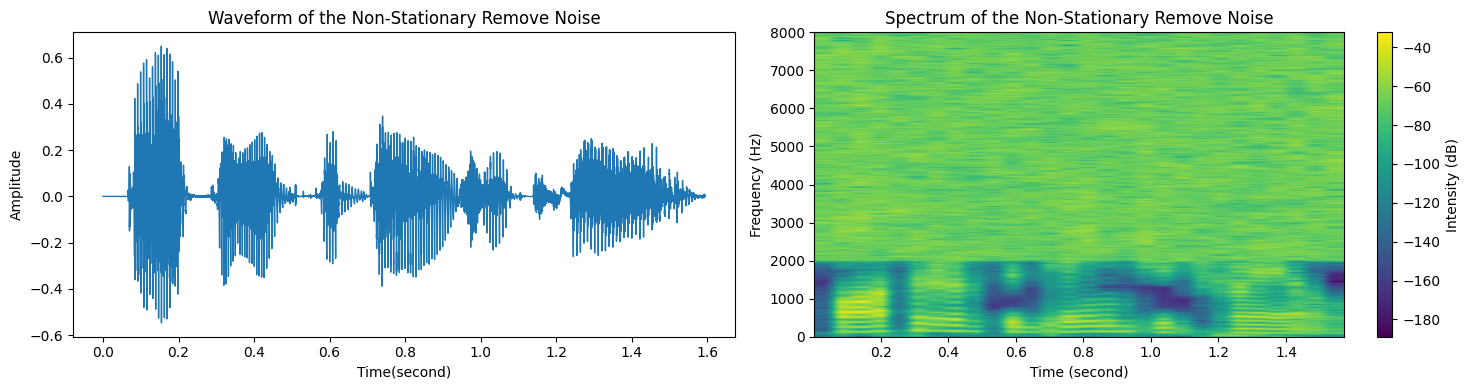

In [ ]:
plt.figure(figsize=(15, 4))
time = np.arange(0, len(reduced_noises_nonstationary )) / rate
plt.subplot(1, 2, 1)
plt.plot(time, data, lw=1)
plt.title('Waveform of the Non-Stationary Remove Noise')
plt.xlabel('Time(second)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
specgram = plt.specgram(reduced_noises_nonstationary, Fs=rate, cmap='viridis', NFFT=1024)
cbar = plt.colorbar(specgram[3])
plt.title('Spectrum of the Non-Stationary Remove Noise')
plt.xlabel('Time (second)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity (dB)')

plt.tight_layout()
plt.show()

In [ ]:
IPython.display.Audio(data=reduced_noise_nonstationary, rate=rate)

#Compare Reduced Stationary and NonStationary Noise



In [ ]:
if energy_noise_stationary == energy_noise_nonstationary:
    boolean = True
    print("The addition(+) or reduction(-) of noise at the end of the experiment is %s."%(energy_noise_stationary))
else:
    boolean = False
    print("The addition(+) or reduction(-) of noise at the end of the experiment is %s."%(energy_noise_stationary))
    print("The addition(+) or reduction(-) of noise at the end of the experiment is %s."%(energy_noise_nonstationary))

print(boolean)


The addition(+) or reduction(-) of noise at the end of the experiment is -199.0744383880316.
The addition(+) or reduction(-) of noise at the end of the experiment is -98.21209257497259.
False
